In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df_metrics = pd.read_csv('metrics_compact.csv')
df_metrics.head()

,usergroup,chat_id,conv_id,RR,RD,rating,duration,initiatedByUser,length,turnsByUser,numWords
0,default,95008127,1,1.0,9.50,4.0,23,True,8,3,0.0
1,default,95008127,2,1.0,11.00,5.0,77,True,8,3,2.0
2,default,95008127,3,1.0,19.67,4.0,66,False,11,4,0.0
3,default,95008127,4,1.0,164.00,5.0,844,True,9,4,4.0
4,default,95008127,5,1.0,152.67,4.0,490,True,11,5,4.0


In [3]:
is_NaN = df_metrics.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_metrics[row_has_NaN]
print(len(rows_with_NaN))
rows_with_NaN

142


,usergroup,chat_id,conv_id,RR,RD,rating,duration,initiatedByUser,length,turnsByUser,numWords
99,default,105121899,3,0.50,3056.50,NaN,6114,False,4,1,0.0000
100,default,105121899,4,0.00,0.00,NaN,8,True,4,1,0.0000
101,default,105121899,5,0.67,2209.67,NaN,3316,False,7,2,0.0000
102,default,105121899,6,0.50,6365.50,NaN,12731,False,4,1,0.0000
103,default,105121899,7,0.00,0.00,NaN,86394,False,2,0,0.0000
105,default,131217570,2,0.50,9287.50,NaN,19271,False,28,13,2.8333
106,default,131217570,3,0.33,3076.33,NaN,10730,False,5,1,0.0000
107,default,131217570,4,0.00,0.00,NaN,86397,False,44,0,0.0000
116,custom,152676961,9,0.00,0.00,NaN,86399,False,7,0,0.0000
190,default,177635781,3,0.00,0.00,NaN,2,True,3,1,4.0000


In [5]:
df_metrics['rating']=df_metrics['rating'].fillna(0)
df_metrics['RR']=df_metrics['RR'].fillna(0)
df_metrics['RD']=df_metrics['RD'].fillna(0)
df_metrics

,usergroup,chat_id,conv_id,RR,RD,rating,duration,initiatedByUser,length,turnsByUser,numWords
0,default,95008127,1,1.0,9.50,4.0,23,True,8,3,0.0000
1,default,95008127,2,1.0,11.00,5.0,77,True,8,3,2.0000
2,default,95008127,3,1.0,19.67,4.0,66,False,11,4,0.0000
3,default,95008127,4,1.0,164.00,5.0,844,True,9,4,4.0000
4,default,95008127,5,1.0,152.67,4.0,490,True,11,5,4.0000
5,default,95008127,6,1.0,3.00,4.0,54,True,14,6,1.0000
6,default,95008127,7,1.0,1438.50,5.0,2878,False,6,2,0.0000
7,default,95008127,8,1.0,17.00,4.0,33,True,5,2,4.0000
8,default,95008127,9,1.0,9.00,4.0,11,True,5,2,4.0000
9,default,95008127,10,1.0,186.50,5.0,378,False,9,3,0.0000


<Figure size 360x504 with 0 Axes>

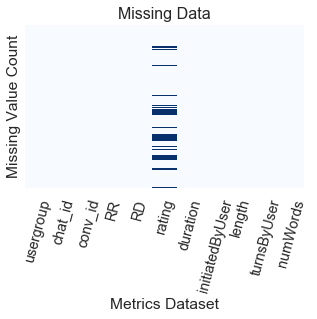

In [6]:
import numpy as np

plt.figure(figsize=(5,7))
sns.set(font_scale = 1.3)
sns.set_style("whitegrid")
plt.figure(figsize=(5, 3))
null_heatmap = sns.heatmap(df_metrics.isnull(), yticklabels=False, cbar=False, cmap='Blues')
null_heatmap.set_xticklabels(null_heatmap.get_xticklabels(), rotation=75)

plt.xlabel("Metrics Dataset")
plt.ylabel("Missing Value Count")
plt.title("Missing Data", y=1.025, fontsize = 16)

null_heatmap_fig = null_heatmap.get_figure()
#null_heatmap_fig.savefig("../documentation/images/null_heatmap.eps", format='eps', bbox_inches='tight')